In [2]:
"""
__author__= "Student ID - 17003740" 
__date__= "2020-12-01"
__version__= "1"
__data_source__= "https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/"

"""

# Import libraries used in this assignment. 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.utils import shuffle
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import learning_curve

In [3]:
#------------------------------- T A S K 1 ------------------------------------

# a. Use Pandas to load the data and report the number of data points (rows) in the dataset.

wine = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/wine-quality/winequality-white.csv', sep = ';')
wine.head()

print(f'The white wine dataset has {len(wine)} data points.')
print(wine.shape)

#-----------------------------------------------------------------------------

The white wine dataset has 4898 data points.
(4898, 12)


In [4]:
# b. Report the number of features in the dataset and the number of data points in each class.

print('Number of columns in dataset =', len(wine.columns))
features = len(wine.columns) - 1
print('Number of features in dataset =', features)
wine.groupby(['quality']).agg(['count'])
count_per_class = wine.groupby('quality')['quality'].count()
print("Number of data points per class:\n", count_per_class)
count_per_class.sum(axis = 0)
count_table = count_per_class.to_frame()
count_table = count_table.rename(columns={'quality': 'data points in each class'})
print(count_table)

#-----------------------------------------------------------------------------

Number of columns in dataset = 12
Number of features in dataset = 11
Number of data points per class:
 quality
3      20
4     163
5    1457
6    2198
7     880
8     175
9       5
Name: quality, dtype: int64
         data points in each class
quality                           
3                               20
4                              163
5                             1457
6                             2198
7                              880
8                              175
9                                5


In [5]:
# c. Perform random permutations of the data using the function, shuffle, from sklearn.utils. 

wine_shuffle = shuffle(wine, random_state = 20)
wine_shuffle = wine_shuffle.reset_index(drop = True)

print(wine_shuffle)

#-----------------------------------------------------------------------------

      fixed acidity  volatile acidity  citric acid  residual sugar  chlorides  \
0               6.7             0.280         0.34            8.90      0.048   
1               9.0             0.290         0.34           12.10      0.030   
2               6.9             0.190         0.38            1.15      0.023   
3               6.5             0.170         0.33            1.40      0.028   
4               7.6             0.200         0.31            1.40      0.047   
...             ...               ...          ...             ...        ...   
4893            5.8             0.190         0.49            4.90      0.040   
4894            4.7             0.455         0.18            1.90      0.036   
4895            8.2             0.180         0.49            1.10      0.033   
4896            7.1             0.310         0.25           11.20      0.048   
4897            7.3             0.170         0.24            8.10      0.121   

      free sulfur dioxide  

Text(0.5, 1.0, 'Fixed Acidity vs. Density')

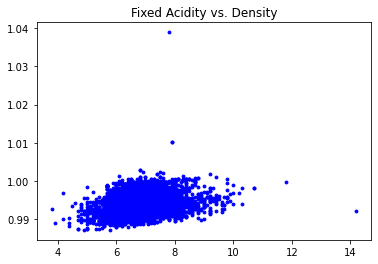

In [6]:
# d. Produce one scatter plot, that is, one feature against another feature. 

fig = plt.figure()
ax = plt.gca()

ax.scatter('fixed acidity', 'density', data = wine, color = 'b', s = 8)

ax.set_title("Fixed Acidity vs. Density")

In [7]:
#------------------------------- T A S K 2 ------------------------------------

# a. Perform a PCA analysis on the whole white_wine dataset.

pca_analysis = PCA(n_components = 2)
wine_pca = pca_analysis.fit_transform(wine)

print(wine_pca)

#-----------------------------------------------------------------------------

[[ 33.73217215   1.24068899]
 [-11.92607156 -18.95547531]
 [-41.22486841   5.73918086]
 ...
 [-27.99447972   1.98669135]
 [-31.62911071  -7.35635123]
 [-42.66925466  -2.30126756]]


<function matplotlib.pyplot.show(close=None, block=None)>

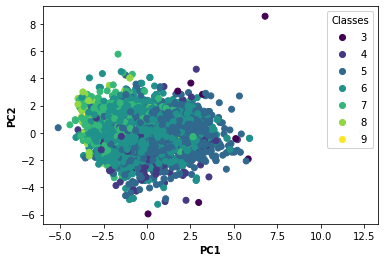

In [8]:
# b. Plot the data in the PC1 and PC2 projections and label/colour the data in the plot according to their class labels.

x = StandardScaler().fit_transform(wine)
wine_pca = pca_analysis.fit_transform(x)

PC1 = wine_pca[:, 0]
PC2 = wine_pca[:, 1]

fig, ax = plt.subplots()

scatter = ax.scatter(PC1, PC2, c = wine['quality'])

# produce a legend with the unique colors from the scatter.
legend = ax.legend(*scatter.legend_elements(),
                    loc = "upper right", title = "Classes")
ax.add_artist(legend)

plt.xlabel('PC1', weight = 'bold')
plt.ylabel('PC2', weight = 'bold')
plt.show

#-----------------------------------------------------------------------------

In [9]:
# c. Report the variance captured by each principal component. 

inputs = wine[['fixed acidity', 'volatile acidity', 'citric acid',
                'residual sugar','chlorides', 'free sulfur dioxide',
                'total sulfur dioxide', 'density', 'pH', 'sulphates',
                'alcohol']]

features = inputs.T

covariance_matrix =  np.cov(features)

print(covariance_matrix)

#-----------------------------------------------------------------------------

[[ 7.12113586e-01 -1.93057060e-03  2.95325116e-02  3.81021814e-01
   4.25625536e-04 -7.08918642e-01  3.26601339e+00  6.69677256e-04
  -5.42648260e-02 -1.65099229e-03 -1.25532822e-01]
 [-1.93057060e-03  1.01595410e-02 -1.82327755e-03  3.28653337e-02
   1.55277486e-04 -1.66300459e-01  3.82353903e-01  8.17393269e-06
  -4.85753094e-04 -4.10990231e-04  8.39972309e-03]
 [ 2.95325116e-02 -1.82327755e-03  1.46457930e-02  5.78289265e-02
   3.02383813e-04  1.93629777e-01  6.22988708e-01  5.41137964e-05
  -2.99234513e-03  8.60882914e-04 -1.12782389e-02]
 [ 3.81021814e-01  3.28653337e-02  5.78289265e-02  2.57257702e+01
   9.82750206e-03  2.58005779e+01  8.65313030e+01  1.27271653e-02
  -1.48683661e-01 -1.54347435e-02 -2.81274033e+00]
 [ 4.25625536e-04  1.55277486e-04  3.02383813e-04  9.82750206e-03
   4.77333710e-04  3.76744976e-02  1.84687489e-01  1.68075352e-05
  -2.98364855e-04  4.17968689e-05 -9.68423502e-03]
 [-7.08918642e-01 -1.66300459e-01  1.93629777e-01  2.58005779e+01
   3.76744976e-02  

In [10]:
#------------------------------- T A S K 3 ------------------------------------

# a. Take out the first 1000 rows from white_wine and save it as the validation set.
# b. Take out the last 1000 rows from white_wine and save it as the test set.
# c. Save the rest of rows from white_wine as the training set.

inputs = wine[['fixed acidity', 'volatile acidity',
                 'citric acid', 'residual sugar','chlorides',
                 'free sulfur dioxide', 'total sulfur dioxide', 'density',
                 'pH', 'sulphates', 'alcohol']]

target = wine[['quality']]

print(wine.shape)

x_train, x_test, y_train, y_test = train_test_split(inputs,
                                                    target,
                                                    test_size = (1000/4898),
                                                    shuffle = False)

print(x_test.shape)
print(x_train.shape)

x_trn, x_val, y_trn, y_val = train_test_split(x_train,
                                              y_train,
                                              test_size = (1000/3898),
                                              shuffle = False)
print(x_trn.shape)
print(x_val.shape)
print(y_trn.shape)
print(y_val.shape)


(4898, 12)
(1000, 11)
(3898, 11)
(2898, 11)
(1000, 11)
(2898, 1)
(1000, 1)


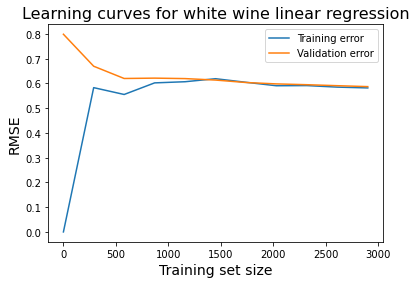

In [11]:
#------------------------------- T A S K 4 -----------------------------------

"""
a. Produce a learning curve of the size of training set against the performance
measurements. The performance should be measured on both the training set and the
validation set. You need to choose at least 10 different sizes for the training set. For
example, the first size may be 10% of the total training set produced in Task 3.
"""        

train_sizes = [1, 289, 579, 869, 1159, 1449, 1738, 2028, 2318, 2608, 2898]
#train_sizes = [1, 100, 200, 300, 400, 500, 600, 700, 800, 900, 1000]
#train_sizes = [1, 500, 1500, 2000, 2500, 3000, 3500, 3918]

features = ['fixed acidity', 'volatile acidity',
            'citric acid', 'residual sugar','chlorides',
            'free sulfur dioxide', 'total sulfur dioxide', 'density',
            'pH', 'sulphates', 'alcohol']
target = ['quality']

train_sizes, train_scores, validation_scores = learning_curve( 
    estimator = LinearRegression(),
    X = wine[features],
    y = wine[target], train_sizes = train_sizes, cv = 5,
    scoring = 'neg_mean_squared_error')

train_scores_mean = -train_scores.mean(axis = 1)
validation_scores_mean = -validation_scores.mean(axis = 1)

plt.plot(train_sizes, train_scores_mean, label = 'Training error')
plt.plot(train_sizes, validation_scores_mean, label = 'Validation error')
plt.ylabel('RMSE', fontsize = 14)
plt.xlabel('Training set size', fontsize = 14)
plt.title('Learning curves for white wine linear regression', fontsize = 16)
plt.legend()


In [12]:
#-----------------------------------------------------------------------------
# b. Report what the best training data size you would like to use for this work is and explain why you choose it.

"""
The best training size is the following. 
This training size decrease bias and increase variance.
"""

best_train_sizes = [1, 289, 579, 869, 1159, 1449, 1738, 2028, 2318, 2608, 2898]


In [13]:
#-----------------------------------------------------------------------------
# c. Report the performance on the test set obtained using the model trained from the best size.

"""
When running the code above on the best training size, we can see from the plot that it gives a small
gap between the errors. A narrow gap indicates low variance, it also gives a high training error,
which is better in order to generalise the regression model on the remaining data
that's not yet been trained.
"""


'\nWhen running the code above on the best training size, we can see from the plot that it gives a larger\ngap between the errors. A narrow gap indicates low variance, and a wider gap\nindicates greater the variance. It also gives a low training error and \na higher validation error, which is the norm.\n'

In [14]:
#------------------------------- T A S K 5 ------------------------------------

"""
In Task 1, we found that the dataset contained 4898 data points.
Setting the ‘quality’ of wine as a class we found the number of points in each class,
quality of value 6 was the most common.Then we produced a scatter plot of “Fixed Acidity” against “Density”.
For Task 2, a principle component analysis was performed on the entire white wine dataset, and projections were
plotted according to class labels. Then the dataset was divided into validation, training, and test sets in Task 3,
and a learning curve was plotted in Task 4. The data seemed to produce a curve with a small gap between the training
and validation errors, meaning the experimental design has low variance. This could underfit the training data.
Some ways to solve this would be training the current set on more features to produce a more complex design.

"""

'\nIn Task 1, we found that the dataset contained 4898 data points.\nSetting the ‘quality’ of wine as a class we found the number of points in each class,\nquality of value 6 was the most common.Then we produced a scatter plot of “Fixed Acidity” against “Density”.\nFor Task 2, a principle component analysis was performed on the entire white wine dataset, and projections were\nplotted according to class labels. Then the dataset was divided into validation, training, and test sets in Task 3,\nand a learning curve was plotted in Task 4. The data seemed to produce a curve with a small gap between the training\nand validation errors, meaning the experimental design has low variance. This could underfit the training data.\nSome ways to solve this would be training the current set on more features to produce a more complex design.\n\n'